# Big Data Mart Sales Problem

    The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.The aim is to build a predictive model and find out the sales of each product at a particular store.
    Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [130]:
df=pd.read_csv('bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [131]:
df.shape

(8523, 12)

In [132]:
x_test2=pd.read_csv('bigdatamart_Test.csv')
x_test2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [133]:
x_test2.shape

(5681, 11)

# EDA

In [134]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


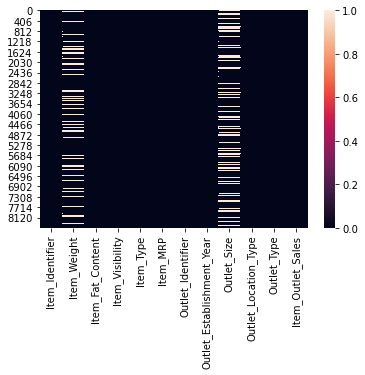

In [136]:
sns.heatmap(df.isnull())
plt.show()

In [137]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Columns such as Item_Weight and Outlet_Size has missing values.

## Correlation Matrix

In [138]:
corr=df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


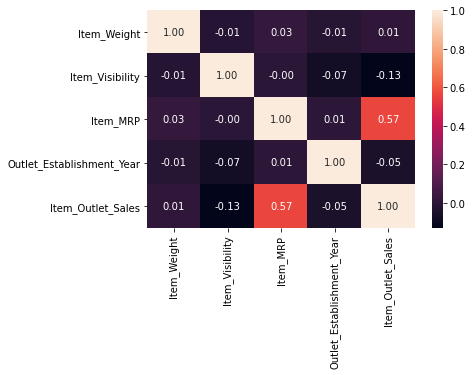

In [139]:
sns.heatmap(corr,annot=True,fmt='.2f')
plt.show()

In [140]:
corr['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

### -Target variable is highly correleated with Item_MRP attribute.
### -Item_Weight attribute has poor correleation with target variable and this column has lots of missing values, hence we can drop this column.

In [141]:
df.drop('Item_Weight',axis=1,inplace=True)

In [142]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Univariate Analysis

In [143]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [144]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCY18     9
FDD38     9
FDX04     9
         ..
FDC23     1
FDO33     1
FDN52     1
FDE52     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64

### Item_Identifier column is not necessary for sales prediction, hence we can drop this column.

In [145]:
df.drop('Item_Identifier',axis=1,inplace=True)

In [146]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [147]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [148]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### - Categories such as 'Low Fat', 'LF', 'low fat' are similar.
### - Categories such as 'reg', 'Regular' are similar.
## Hence convert them into single category such as 'Low Fat' and 'Regular'

In [149]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

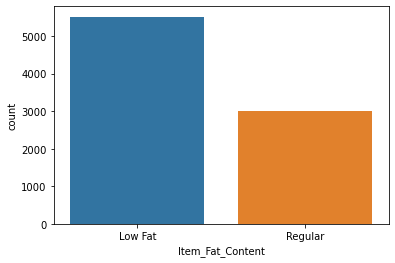

In [150]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

In [151]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Most of the products across outlets have low fat content.

In [152]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

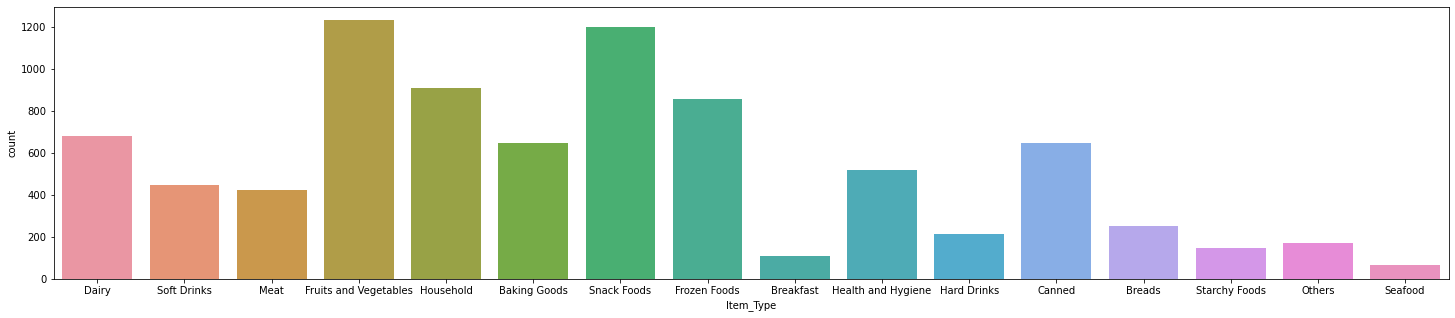

In [153]:
plt.figure(figsize=(25,5))
sns.countplot(df['Item_Type'])
plt.show()

In [154]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Most of the products across outlets are fruits and vegetables, snack foods, household products, frozen foods.

In [155]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [156]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

### Outlet_Identifier column is not necessary for sales prediction, hence we can drop this column.

In [157]:
df.drop('Outlet_Identifier',axis=1,inplace=True)

In [158]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [159]:
est_year=df['Outlet_Establishment_Year'].unique()
est_year

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [160]:
set(est_year)

{1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009}

In [161]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

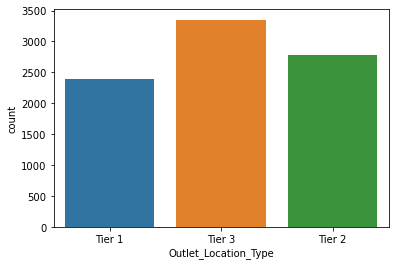

In [162]:
sns.countplot(df['Outlet_Location_Type'])
plt.show()

In [163]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

### Majority of outlets are in Tier 3 towns/cities.

In [164]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

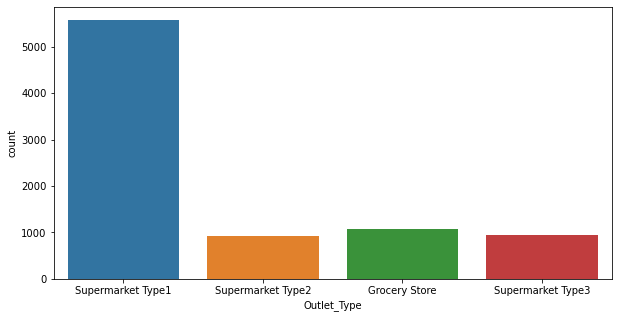

In [165]:
plt.figure(figsize=(10,5))
sns.countplot(df['Outlet_Type'])
plt.show()

In [166]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

### Majority of the outlets are of the type Supermarket Type 1.

In [167]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [168]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [169]:
df['Outlet_Size'].isnull().sum()

2410

### Outlet_Size column has missing values.  

## Handling the NaN values.

### Since Outlet_Size column has categorical values lets fill the NaN values with Mode(frequently repeated).
### Let's consider Outlet_Location_Type to fill NaN values.

In [170]:
df.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

### Since Tier 2(Outlet_Location_Type) has only Small(Outlet_Size).
### Therefore, If Outlet_Location_Type is Tier 2 and if it's corresponding Outlet_Size column has NaN values then fill those NaN values with 'Small'(Outlet_Size).

In [171]:
df.loc[df['Outlet_Location_Type']=='Tier 2', 'Outlet_Size'] = 'Small'

In [172]:
df['Outlet_Size'].isnull().sum()

555

### Let's consider Outlet_Type to fill NaN values further.

In [173]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          3715
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

### Supermarket Type 3(Outlet_Type) has only Medium(Outlet_Size).

In [174]:
df.loc[df['Outlet_Type']=='Supermarket Type3', 'Outlet_Size'] = 'Medium'

In [175]:
df['Outlet_Size'].isnull().sum()

555

### Supermarket Type 2(Outlet_Type) has only Medium(Outlet_Size).

In [176]:
df.loc[df['Outlet_Type']=='Supermarket Type2', 'Outlet_Size'] = 'Medium'

In [177]:
df['Outlet_Size'].isnull().sum()

555

### Grocery Store(Outlet_Type) has only Small(Outlet_Size).

In [178]:
df.loc[df['Outlet_Type']=='Grocery Store', 'Outlet_Size'] = 'Medium'

In [179]:
df['Outlet_Size'].isnull().sum()

0

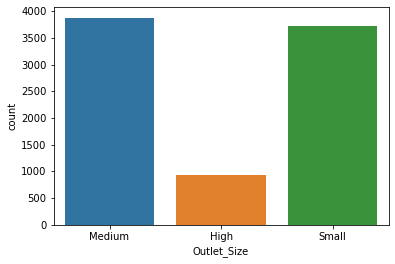

In [180]:
sns.countplot(df['Outlet_Size'])
plt.show()

In [181]:
df['Outlet_Size'].value_counts()

Medium    3876
Small     3715
High       932
Name: Outlet_Size, dtype: int64

### Majority of the outlets are of medium size.

## Bivariate Analysis.

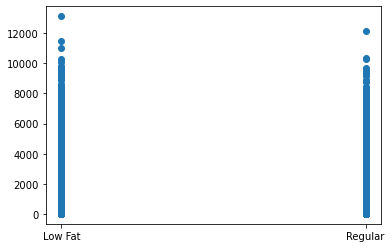

In [182]:
plt.scatter(df['Item_Fat_Content'],df['Item_Outlet_Sales'])
plt.show()

### Sales of products with low fat content is higher.

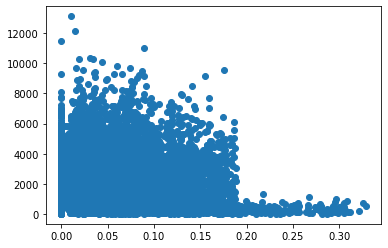

In [183]:
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'])
plt.show()

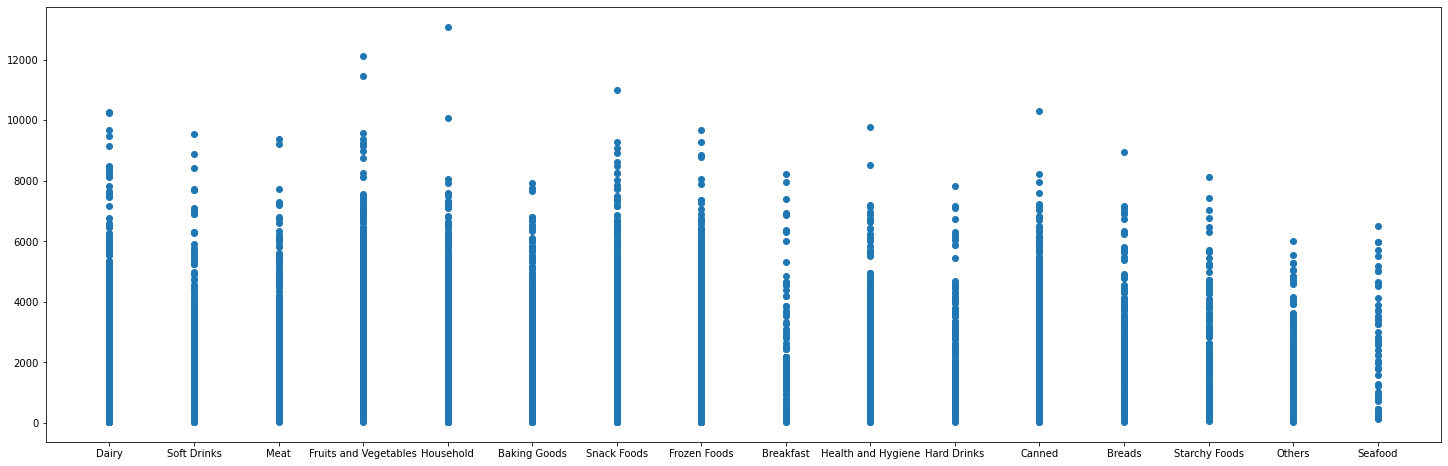

In [184]:
plt.figure(figsize=(25,8))
plt.scatter(df['Item_Type'],df['Item_Outlet_Sales'])
plt.show()

### Sales of products such as household products, fruits and vegetables, snack foods, frozen foods are higher.

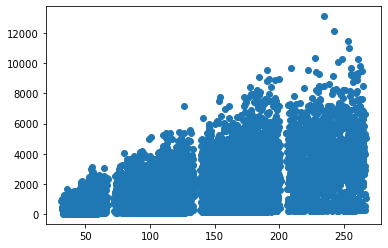

In [185]:
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
plt.show()

### Sales of products of higher MRP is better.

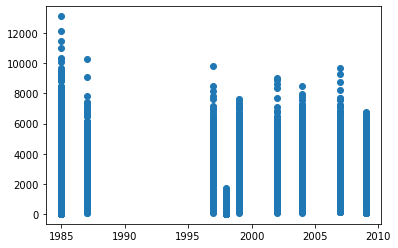

In [186]:
plt.scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])
plt.show()

### Older outlets have better sales output.

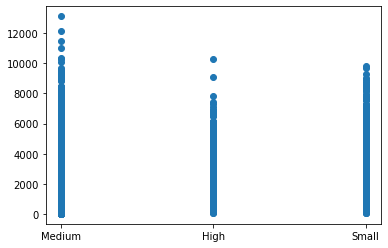

In [187]:
plt.scatter(df['Outlet_Size'],df['Item_Outlet_Sales'])
plt.show()

### Sales of medium outlets (Outlet_Size) is better.

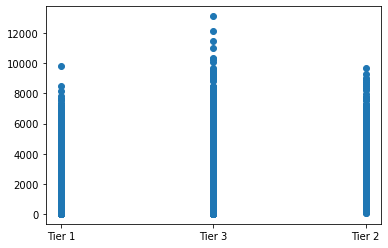

In [188]:
plt.scatter(df['Outlet_Location_Type'],df['Item_Outlet_Sales'])
plt.show()

### Sales of outlets in Tier 3 (Outlet_Location_Type) is better.

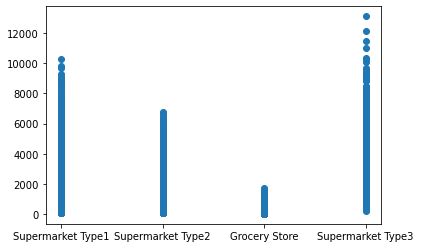

In [189]:
plt.scatter(df['Outlet_Type'],df['Item_Outlet_Sales'])
plt.show()

### Sales of Supermarket Type 3 (Outlet_Type) is better.

## Checking Outliers

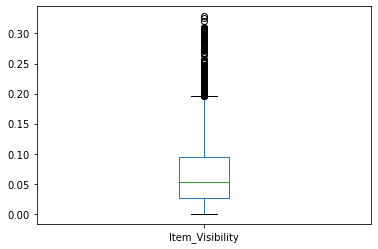

In [190]:
df['Item_Visibility'].plot.box()
plt.show()

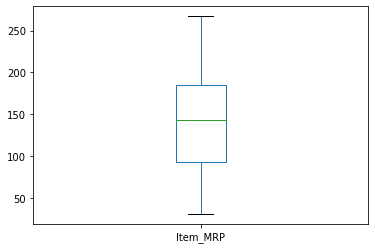

In [191]:
df['Item_MRP'].plot.box()
plt.show()

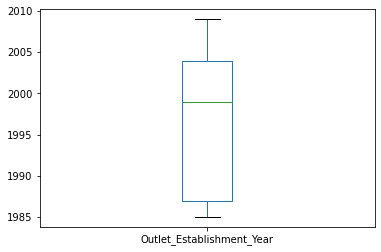

In [192]:
df['Outlet_Establishment_Year'].plot.box()
plt.show()

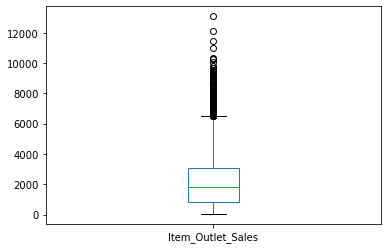

In [193]:
df['Item_Outlet_Sales'].plot.box()
plt.show()

### From above box plots it is clear that outliers exist.

## Label Encoding

In [194]:
col_list = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [195]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in col_list:
    df[i]=le.fit_transform(df[i])

In [196]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,0,0.000000,9,53.8614,1987,0,2,1,994.7052


# Removing Outliers

## 1. Z-score Method

In [197]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [198]:
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
         991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
        1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
        1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
        2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
        3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
        3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
        4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
        4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
        5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
        5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
        6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
        6886, 6903, 6993, 7005, 7016, 

In [199]:
# Threshold=3
sd = df[(z<3).all(axis=1)]

In [200]:
print(df.shape)
print(sd.shape)

(8523, 9)
(8338, 9)


In [201]:
# percentage loss of data
per_loss=((8523-8338)/8523)*100
per_loss

2.170597207556025

### Since significant amount of data is not lost after removing outliers, we can go ahead. 

# Checking Skewness

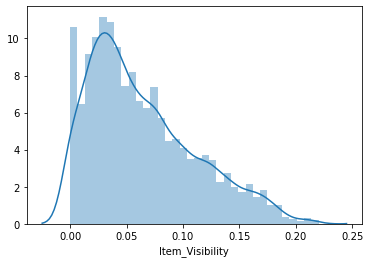

In [202]:
sns.distplot(sd['Item_Visibility'])
plt.show()

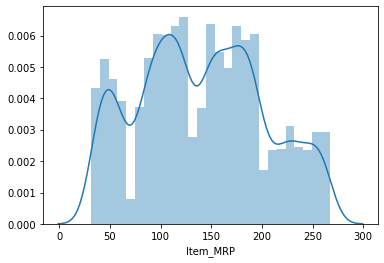

In [203]:
sns.distplot(sd['Item_MRP'])
plt.show()

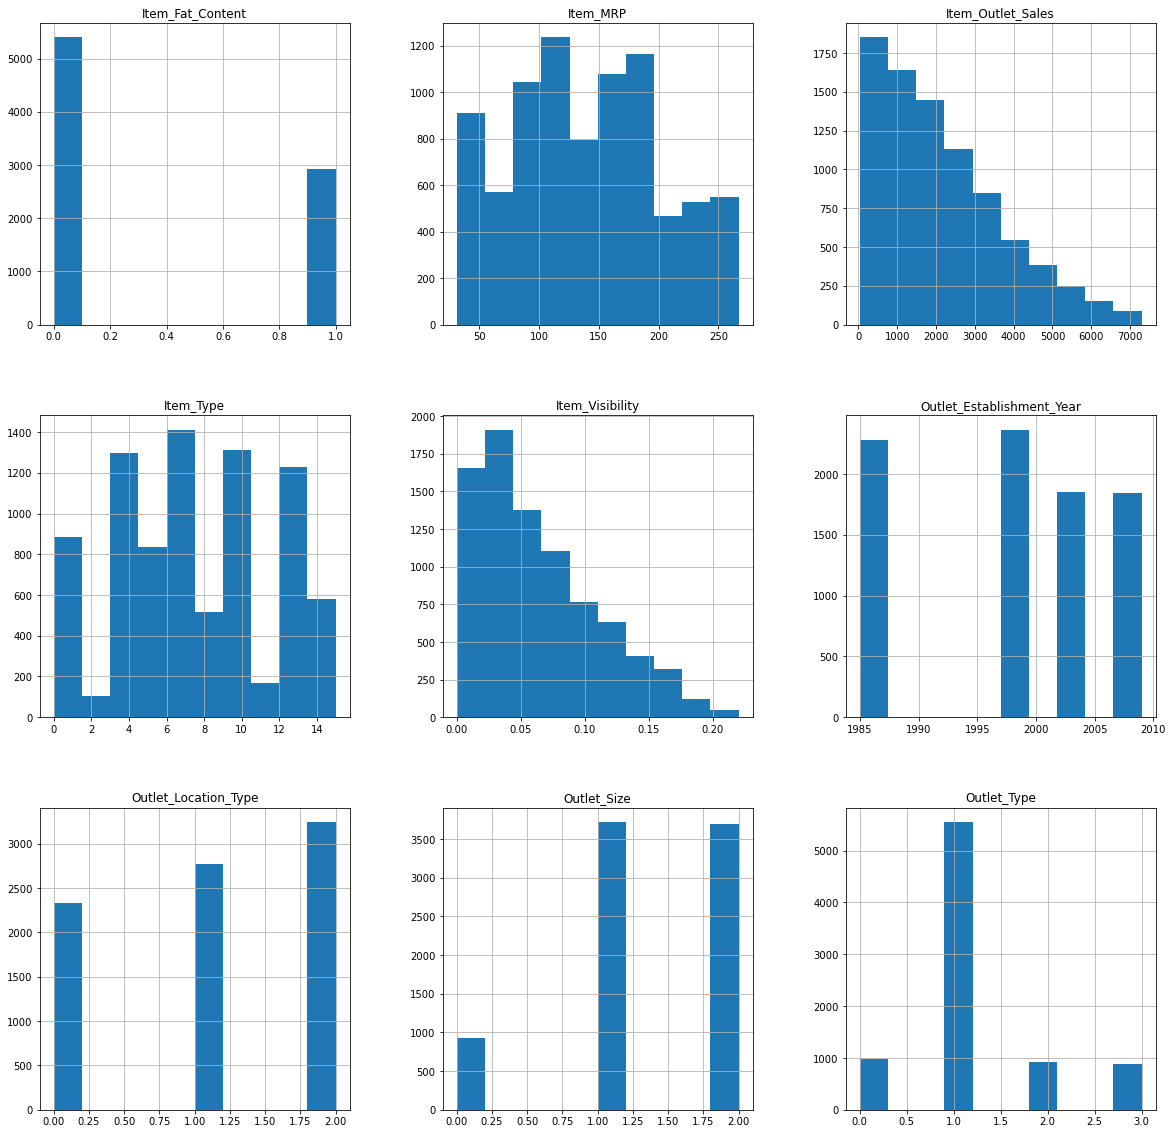

In [204]:
sd.hist(figsize=(20,20))
plt.show()

In [205]:
sd.skew()

Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.495821
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

### Skewness exist.

In [206]:
x=sd.drop('Item_Outlet_Sales',axis=1)
x

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,0.016047,4,249.8092,1999,1,0,1
1,1,0.019278,14,48.2692,2009,1,2,2
2,0,0.016760,10,141.6180,1999,1,0,1
3,1,0.000000,6,182.0950,1998,1,2,0
4,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...
8518,0,0.056783,13,214.5218,1987,0,2,1
8519,1,0.046982,0,108.1570,2002,2,1,1
8520,0,0.035186,8,85.1224,2004,2,1,1
8521,1,0.145221,13,103.1332,2009,1,2,2


In [207]:
y=sd['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

## Removing Skewness

In [208]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing data

In [209]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [211]:
# finding the best random_state

s=0
for i in range(20,800):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    if mod_acc>s:
        s=mod_acc
        best_random_state=i
        
print(f" Best r2_score is {s*100} which is found on {best_random_state}")

 Best r2_score is 55.12573149504952 which is found on 456


In [212]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=best_random_state)

In [213]:
# finding the best cv

cv=0
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best cross_val_score is {cv*100} which is found on cv = {best_cv}")

 Best cross_val_score is 51.91028320243763 which is found on cv = 2


# Finding The Best Model

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor

In [215]:
mod_list = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),DecisionTreeRegressor(),SVR(),
            KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),
            GradientBoostingRegressor(),SGDRegressor()]

In [216]:
for i in mod_list:
    print(i)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    mod_acc=r2_score(y_test,y_pred)
    print('r2_score:',mod_acc*100)
    cv_score=cross_val_score(i,x,y,cv=best_cv).mean()
    print('Cross_val_score:',cv_score*100)
    print('Difference:',(mod_acc*100)-(cv_score*100))
    print('Training score:',i.score(x_train,y_train)*100)
    print('Error')
    print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
    print('Mean squared error:',mean_squared_error(y_test,y_pred))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')

LinearRegression()
r2_score: 55.12573149504952
Cross_val_score: 51.91028320243763
Difference: 3.215448292611889
Training score: 50.96295175837715
Error
Mean absolute error: 796.6915177407167
Mean squared error: 1091418.2073909212
Root mean squared error: 1044.709628265635


Lasso()
r2_score: 55.122467745372106
Cross_val_score: 51.91249503253728
Difference: 3.2099727128348263
Training score: 50.962555561118684
Error
Mean absolute error: 796.6751602141752
Mean squared error: 1091497.587310438
Root mean squared error: 1044.7476189541846


Ridge()
r2_score: 55.12560615156757
Cross_val_score: 51.91030962817139
Difference: 3.2152965233961766
Training score: 50.96295005016158
Error
Mean absolute error: 796.6842926727476
Mean squared error: 1091421.2559566796
Root mean squared error: 1044.7110873139422


ElasticNet()
r2_score: 47.88330855042449
Cross_val_score: 45.41388318484283
Difference: 2.4694253655816567
Training score: 44.51881993242435
Error
Mean absolute error: 864.0764954713882
Mean s

### From above it is clear that Gradient Boosting Regressor model is performing better.

In [217]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(gbr,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference:',(mod_acc*100)-(cv_score*100))
print('Training score:',gbr.score(x_train,y_train)*100)
print('Error')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 61.97346977557081
Cross_val_score: 57.954037469473086
Difference: 4.019432306097727
Training score: 61.04503377298916
Error
Mean absolute error: 687.0125346038241
Mean squared error: 924869.6153401288
Root mean squared error: 961.7014169377774


## Hyper-parameter Tuning

In [218]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'loss':['ls','lad','huber','quantile'],
    'n_estimators':[100,150,],
#     'criterion':['friedman_mse','mse','mae'],
    'max_features':['auto','sqrt','log2']
}

In [219]:
gscv=GridSearchCV(gbr,parameters,scoring='r2',cv=best_cv)
gscv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150]},
             scoring='r2')

In [220]:
gscv.best_params_

{'loss': 'lad', 'max_features': 'auto', 'n_estimators': 100}

In [221]:
gbr_ht=GradientBoostingRegressor(loss='lad',n_estimators=100,max_features='auto')
gbr_ht.fit(x_train,y_train)
y_pred=gbr_ht.predict(x_test)
mod_acc=r2_score(y_test,y_pred)
print('r2_score:',mod_acc*100)
cv_score=cross_val_score(gbr_ht,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)
print('Difference:',(mod_acc*100)-(cv_score*100))
print('Training score:',gbr_ht.score(x_train,y_train)*100)
print('\n')
print('Error')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 61.91327223743994
Cross_val_score: 58.46775060037229
Difference: 3.4455216370676496
Training score: 58.8750688372945


Error
Mean absolute error: 686.1113750589176
Mean squared error: 926333.7214157274
Root mean squared error: 962.4623220758969


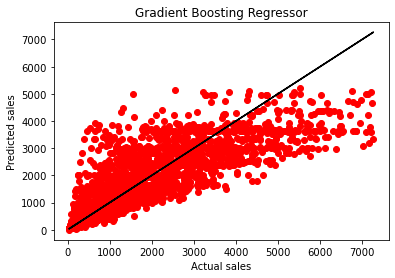

In [222]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='k')
plt.xlabel('Actual sales')
plt.ylabel('Predicted sales')
plt.title('Gradient Boosting Regressor')
plt.show()

In [223]:
df1=pd.DataFrame({'Actual sales':y_test,'Predicted sales':y_pred})
df1

,Actual sales,Predicted sales
1351,89.8830,278.218759
3258,567.2616,310.862312
906,33.2900,-2.891135
1573,4660.6000,3635.432924
6151,239.6880,1028.106110
...,...,...
2796,171.7764,320.898043
7040,1717.7640,1866.343144
7999,2878.2534,3869.392853
5166,2106.5912,2449.666870


# Consider x_test2

In [224]:
x_test2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [225]:
x_test2.drop(columns=['Item_Identifier','Item_Weight','Outlet_Identifier'],inplace=True)

In [226]:
x_test2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [227]:
x_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           5681 non-null   object 
 1   Item_Visibility            5681 non-null   float64
 2   Item_Type                  5681 non-null   object 
 3   Item_MRP                   5681 non-null   float64
 4   Outlet_Establishment_Year  5681 non-null   int64  
 5   Outlet_Size                4075 non-null   object 
 6   Outlet_Location_Type       5681 non-null   object 
 7   Outlet_Type                5681 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 355.2+ KB


### Outlet_Size column has missing values.

In [228]:
x_test2['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [229]:
x_test2['Item_Fat_Content']=x_test2['Item_Fat_Content'].replace('LF','Low Fat')
x_test2['Item_Fat_Content']=x_test2['Item_Fat_Content'].replace('low fat','Low Fat')
x_test2['Item_Fat_Content']=x_test2['Item_Fat_Content'].replace('reg','Regular')

In [230]:
x_test2['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [231]:
x_test2['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [232]:
x_test2['Outlet_Size'].isnull().sum()

1606

In [233]:
x_test2.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small           972
                      Medium          620
Tier 2                Small           620
Tier 3                Medium         1242
                      High            621
Name: Outlet_Size, dtype: int64

### Tier 2 (Outlet_Location_Type) has only small (Outlet_Size)

In [234]:
x_test2.loc[x_test2['Outlet_Location_Type']=='Tier 2', 'Outlet_Size']='Small'

In [235]:
x_test2['Outlet_Size'].isnull().sum()

370

In [236]:
x_test2.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           352
Supermarket Type1  Small          2476
                   High            621
                   Medium          620
Supermarket Type2  Medium          618
Supermarket Type3  Medium          624
Name: Outlet_Size, dtype: int64

### Supermarket Type 3 (Outlet_Type) has only Medium (Outlet_Size).

In [237]:
x_test2.loc[x_test2['Outlet_Type']=='Supermarket Type3', 'Outlet_Size']='Medium'

In [238]:
x_test2['Outlet_Size'].isnull().sum()

370

### Supermarket Type 2 (Outlet_Type) has only Medium (Outlet_Size).

In [239]:
x_test2.loc[x_test2['Outlet_Type']=='Supermarket Type2', 'Outlet_Size']='Medium'

In [240]:
x_test2['Outlet_Size'].isnull().sum()

370

### Grocery Store (Outlet_Type) has only Small (Outlet_Size).

In [241]:
x_test2.loc[x_test2['Outlet_Type']=='Grocery Store', 'Outlet_Size']='Small'

In [242]:
x_test2['Outlet_Size'].isnull().sum()

0

In [243]:
x_test2['Outlet_Size'].value_counts()

Small     3198
Medium    1862
High       621
Name: Outlet_Size, dtype: int64

## Label Encoding

In [244]:
col_list = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in col_list:
    x_test2[i]=le.fit_transform(x_test2[i])

In [245]:
x_test2.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,0.007565,13,107.8622,1999,1,0,1
1,1,0.038428,4,87.3198,2007,2,1,1
2,0,0.099575,11,241.7538,1998,2,2,0
3,0,0.015388,13,155.0340,2007,2,1,1
4,1,0.118599,4,234.2300,1985,1,2,3


## Checking Outliers

In [246]:
z1=np.abs(zscore(x_test2))

In [247]:
test_data = x_test2[(z1<3).all(axis=1)]

In [248]:
print(x_test2.shape)
print(test_data.shape)

(5681, 8)
(5600, 8)


In [249]:
# percentage loss of data
per_loss=((5681-5600)/5681)*100
per_loss

1.425805315965499

## Removing Skewness and Standardizing data

In [250]:
test_data=power_transform(test_data)

test_data=sc.fit_transform(test_data)

## Predicting Sales

In [251]:
outlet_sales = gbr.predict(test_data)

In [252]:
outlet_sales

array([1676.3166236 , 1392.31059471,  530.93859778, ..., 1839.86942173,
       3884.23025151, 1236.53069108])

In [253]:
Sales_predicted=pd.DataFrame({'Sales_predicted':outlet_sales})

In [254]:
Sales_predicted

,Sales_predicted
0,1676.316624
1,1392.310595
2,530.938598
3,2553.920723
4,5291.843144
...,...
5595,2134.776989
5596,2466.588199
5597,1839.869422
5598,3884.230252


In [255]:
import joblib

joblib.dump(gbr,'Sales_Model.obj')

['Sales_Model.obj']

In [256]:
Sales_predicted.to_csv('Sales_predicted')